<h1><center> Time series management with pandas </center></h1>

In [1]:
import pandas as pd # for data managment
from datetime import datetime, timedelta # for time
import random # for random elements
import numpy as np # for scientific calculus

In [2]:
my_year = 2023
my_month = 6
my_day = 21
my_hour =5
my_minute = 21
my_second = 40

In [3]:
my_date = datetime(my_year,my_month,my_day,my_hour,my_minute,my_second)
my_date

datetime.datetime(2023, 6, 21, 5, 21, 40)

###### We can axtract all that we need on this date format. For example, we have

In [4]:
my_hour_extracted = my_date.hour
my_hour_extracted

5

In [5]:
my_year_extracted = my_date.year
my_year_extracted

2023

In [6]:
my_second_extracted = my_date.second
my_second_extracted

40

###### We can print the currently date by:

In [7]:
date_actuelle = datetime.now()
date_actuelle

datetime.datetime(2023, 6, 22, 11, 42, 4, 849137)

###### Pandas index datetime

In [8]:
list_day = [datetime(2023, 6, 21), datetime(2023, 6, 22), datetime(2023,6,23), datetime(2023,6,24)]

We can convert this list to a time series index by doing

In [9]:
ts_index = pd.DatetimeIndex(list_day)
ts_index

DatetimeIndex(['2023-06-21', '2023-06-22', '2023-06-23', '2023-06-24'], dtype='datetime64[ns]', freq=None)

We can easily create a dataframe 

In [10]:
data = np.random.randn(4,3)
cols = ['column_one', 'column_two','column_three']
df = pd.DataFrame(data,ts_index,cols)
df.head()

,column_one,column_two,column_three
2023-06-21,-0.515746,2.821035,-1.088465
2023-06-22,0.957353,0.030781,-1.570207
2023-06-23,0.185565,0.964006,0.383679
2023-06-24,0.487473,-0.298226,1.063497


We can use the argmax and argmin function to give the location of the oldest and t the most recent dates

In [11]:
recent_date = df.index.argmax()
recent_date

3

In [12]:
df.index.max()

Timestamp('2023-06-24 00:00:00')

In [13]:
old_date = df.index.argmin()
old_date

0

In [14]:
df.index.min()

Timestamp('2023-06-21 00:00:00')

<h1><center> Shift using real data </center></h1>

In [15]:
#pip install pandas_datareader

In [16]:
#pip install --upgrade pandas_datareader

In [17]:
#pip install --upgrade pandas

In [18]:
#pip install yfinance

In [19]:
import pandas_datareader.data as pdr

In [20]:
import yfinance as yf

start_date = "2021-01-01"
end_date = "2023-06-30"

bitcoin = yf.download('BTC-USD', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [21]:
bitcoin.head() # to see the first five observations

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782


In [22]:
bitcoin.shape

(902, 6)

In [23]:
bitcoin.tail() # To see the last five observations

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-17,26328.679688,26769.394531,26174.492188,26510.675781,26510.675781,11090276850
2023-06-18,26510.457031,26675.925781,26325.890625,26336.212891,26336.212891,9565695129
2023-06-19,26335.441406,26984.611328,26312.832031,26851.029297,26851.029297,12826986222
2023-06-20,26841.664062,28388.968750,26668.791016,28327.488281,28327.488281,22211859147
2023-06-22,29976.873047,30483.285156,29933.816406,30142.662109,30142.662109,30678476800


###### Forward shift

In [24]:
bitcoin.shift(1).head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,4.073030e+10
2021-01-03,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,6.786542e+10


In [25]:
bitcoin.shift(1).tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-19,26510.457031,26675.925781,26325.890625,26336.212891,26336.212891,9.565695e+09
2023-06-20,26335.441406,26984.611328,26312.832031,26851.029297,26851.029297,1.282699e+10
2023-06-22,26841.664062,28388.968750,26668.791016,28327.488281,28327.488281,2.221186e+10


###### Backward shift

In [26]:
bitcoin.shift(-1).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,6.786542e+10
2021-01-02,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,7.866524e+10
2021-01-03,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,8.116348e+10
2021-01-04,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,6.754732e+10
2021-01-05,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,7.528943e+10


In [27]:
bitcoin.shift(-1).tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-17,26510.457031,26675.925781,26325.890625,26336.212891,26336.212891,9.565695e+09
2023-06-18,26335.441406,26984.611328,26312.832031,26851.029297,26851.029297,1.282699e+10
2023-06-19,26841.664062,28388.968750,26668.791016,28327.488281,28327.488281,2.221186e+10
2023-06-20,29976.873047,30483.285156,29933.816406,30142.662109,30142.662109,3.067848e+10
2023-06-22,NaN,NaN,NaN,NaN,NaN,NaN


We can do a shift using a Time String. 

In [28]:
bitcoin.shift(periods = 1, freq="D").head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-02,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-03,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-04,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-05,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2021-01-06,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782


The df.shift(periods=1, freq="m") method is used to shift the values of a pandas DataFrame by a specified number of periods according to a given frequency. Here's a detailed explanation of the two parameters:

The periods parameter indicates the number of periods (rows) by which you want to shift the values. A positive value will shift the data downwards (towards higher indexes), while a negative value will shift it upwards (towards lower indexes). For example, if you specify periods=1, each value will be shifted down by one row.

The freq parameter specifies the frequency of the data in the DataFrame. It can be used to shift temporal data. Possible values include "D" (day), "H" (hour), "T" (minute), "S" (second), "L" (millisecond), "M" (month), "A" (year), etc. In this example, the value "m" is used to indicate that the data has a monthly frequency.

By using df.shift(periods=1, freq="m"), each value in the DataFrame will be shifted down by one period (one month in this case). The first value will be replaced with NaN (undefined) because there is no previous value to shift.

<h1><center> Rolling </center></h1>

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

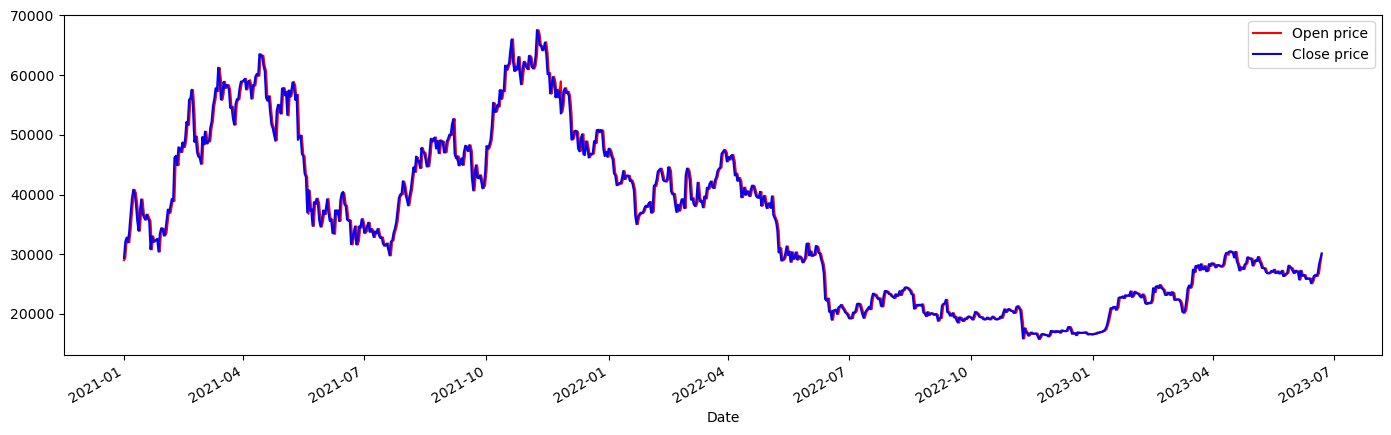

In [30]:
bitcoin.Open.plot(figsize=(17,5), color = 'red', label = 'Open price')
bitcoin['Close'].plot(figsize=(17,5), color = 'blue', label = 'Close price')
plt.legend()
plt.show()

Now let's draw only open price representation and add a moving average! This rolling method provides row entries, where each entry is then representative of the period.

In [31]:
bitcoin.rolling(7).mean().head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07,32305.050223,34614.596819,31270.893415,33777.599051,33777.599051,7.086048e+10
2021-01-08,33789.015346,36378.327009,32418.757812,35409.521484,35409.521484,7.762865e+10
2021-01-09,35419.327567,37561.360491,33831.571150,36570.561384,36570.561384,7.678847e+10


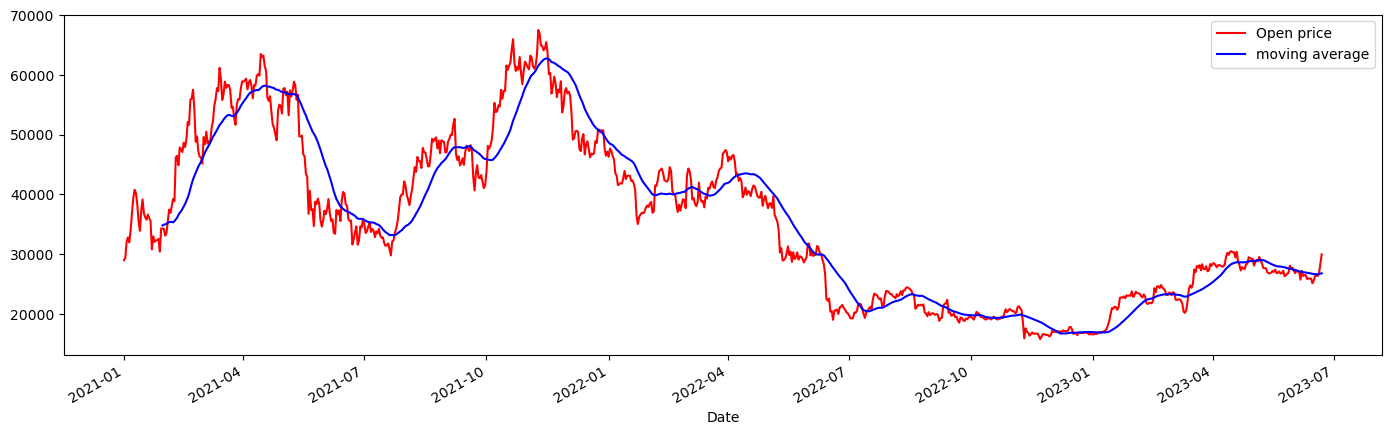

In [32]:
bitcoin['Open'].plot(figsize = (17,5), color = 'red', label = 'Open price')
bitcoin.rolling(window=30).mean()['Close'].plot(color = 'blue', label = 'moving average')
plt.legend()
plt.show()

<h1><center>Expanding</center></h1>

Now, what do you do if you want to include all the data from the beginning of the time series as part of the moving calculation? Instead of limiting it to a specific time window like a 7-day period or a monthly moving average, you want to take into account all the available data since the inception of the time series in a continuous manner.

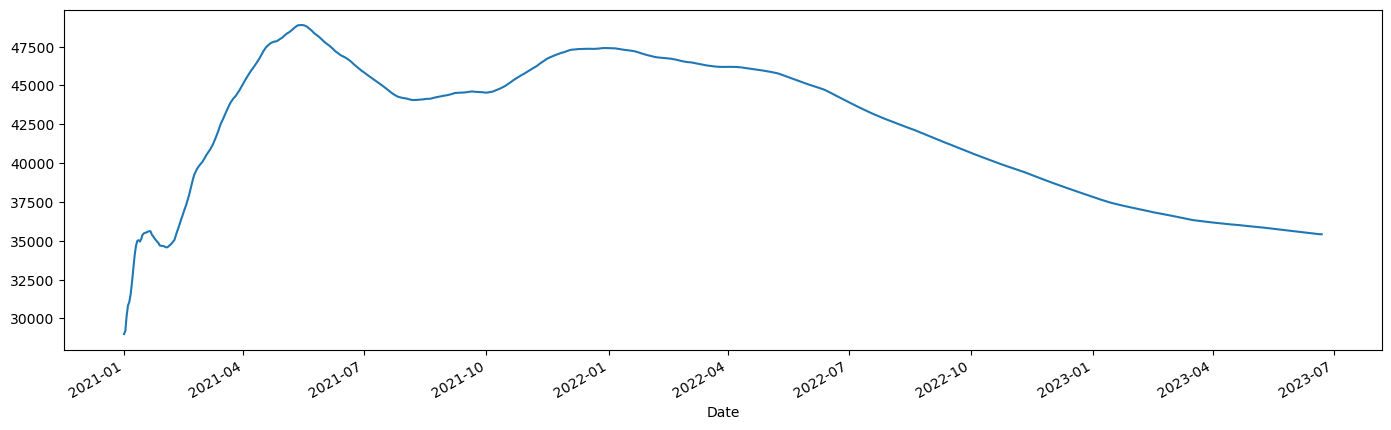

In [33]:
bitcoin['Open'].expanding(min_periods=1).mean().plot(figsize=(17,5))
plt.show()

<h1><center> Les Bandes de Bollinger </center></h1>

This is a short reference on Bollinger band's:   http://www.investopedia.com/terms/b/bollingerbands.asp

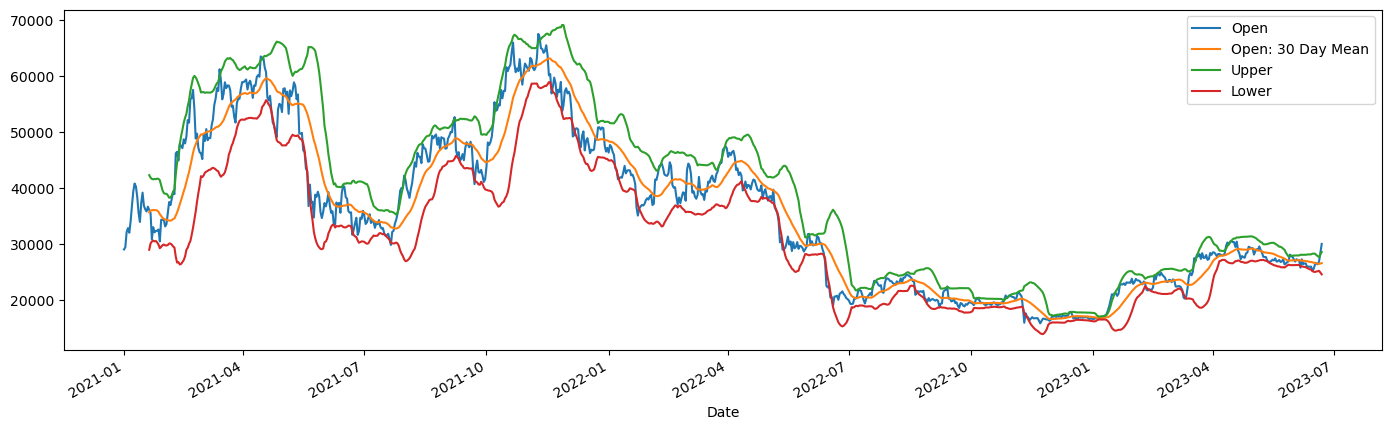

In [36]:
bitcoin['Open: 30 Day Mean'] = bitcoin['Open'].rolling(window=20).mean()
bitcoin['Upper'] = bitcoin['Open: 30 Day Mean'] + 2*bitcoin['Open'].rolling(window=20).std()
bitcoin['Lower'] = bitcoin['Open: 30 Day Mean'] - 2*bitcoin['Open'].rolling(window=20).std()
bitcoin[['Open','Open: 30 Day Mean','Upper','Lower']].plot(figsize=(17,5))
plt.show()